In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("IMDb Movies India.csv",encoding="latin-1")

In [ ]:
df

Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

In [ ]:
#Check for missing values in each column
print("/nMissing values in each column:")
df.isnull().sum()

/nMissing values in each column:


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
print("\nCount of unique values in 'Name' column:")
print(df['Name'].value_counts())


Count of unique values in 'Name' column:
Name
Mamta                 7
Anjaam                7
Zindagi               6
Musafir               6
Laila Majnu           5
                     ..
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Hameshaa              1
Hamid                 1
Hamari Kahani         1
Name: count, Length: 13838, dtype: int64


In [ ]:
print("\nCount of unique values in 'Year' column:")
print(df['Year'].value_counts())


Count of unique values in 'Year' column:
Year
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1922)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: count, Length: 102, dtype: int64


In [ ]:
print("\nCount of unique values in 'Duration' column:")
print(df['Duration'].value_counts())


Count of unique values in 'Duration' column:
Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
204 min      1
235 min      1
298 min      1
217 min      1
250 min      1
Name: count, Length: 182, dtype: int64


In [ ]:
print("\nCount of unique values in 'Genre' column:")
print(df['Genre'].value_counts())


Count of unique values in 'Genre' column:
Genre
Drama                              2780
Action                             1289
Thriller                            779
Romance                             708
Drama, Romance                      524
                                   ... 
Documentary, Biography, History       1
Documentary, Adventure, Drama         1
Crime, Horror, Romance                1
Animation, Drama, Adventure           1
Adventure, Horror                     1
Name: count, Length: 485, dtype: int64


In [ ]:
print("\nCount of unique values in 'Rating' column:")
print(df['Rating'].value_counts())


Count of unique values in 'Rating' column:
Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


In [ ]:
print("\nCount of unique values in 'Votes' column:")
print(df['Votes'].value_counts())


Count of unique values in 'Votes' column:
Votes
8         227
7         224
9         221
6         213
10        175
         ... 
2,211       1
1,799       1
5,546       1
629         1
13,936      1
Name: count, Length: 2034, dtype: int64


In [ ]:
print("\nCount of unique values in 'Director' column:")
print(df['Director'].value_counts())


Count of unique values in 'Director' column:
Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
                   ..
Sunanda Mitra       1
Amit Chauhan        1
Dev Dutt            1
Anil Srikantam      1
Vishal Taneja       1
Name: count, Length: 5938, dtype: int64


In [ ]:
print("\nCount of unique values in 'Actor 1' column:")
print(df['Actor 1'].value_counts())


Count of unique values in 'Actor 1' column:
Actor 1
Ashok Kumar              158
Jeetendra                140
Dharmendra               140
Mithun Chakraborty       133
Amitabh Bachchan         129
                        ... 
Nitesh Tiwari              1
Sonu Sonkar                1
Rahul Tiwari Adhiyari      1
Raj Devgan                 1
Kawal Sharma               1
Name: count, Length: 4718, dtype: int64


In [ ]:
print("\nCount of unique values in 'Actor 2' column:")
print(df['Actor 2'].value_counts())


Count of unique values in 'Actor 2' column:
Actor 2
Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Sumeet Sharma          1
Lokendra Singh         1
Vinod Kapoor           1
Umesh Sharma           1
Victor John            1
Name: count, Length: 4891, dtype: int64


In [ ]:
print("\nCount of unique values in 'Actor 3' column:")
print(df['Actor 3'].value_counts())


Count of unique values in 'Actor 3' column:
Actor 3
Pran              91
Shakti Kapoor     65
Anupam Kher       64
Jeevan            59
Prem Chopra       52
                  ..
Shanta Pawar       1
Shraddha Das       1
Usman Rao          1
Ugresen Tanwar     1
Prem Chabra        1
Name: count, Length: 4820, dtype: int64


In [ ]:
print("\nDuplicate rows in the Dataframe:")
print(df.duplicated().sum())


Duplicate rows in the Dataframe:
6


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      14976 non-null  object 
 2   Duration  7239 non-null   object 
 3   Genre     13627 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14979 non-null  object 
 7   Actor 1   13888 non-null  object 
 8   Actor 2   13122 non-null  object 
 9   Actor 3   12363 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# Compute and fill missing with median
median_year = df['Year'].median()
df['Year'] = df['Year'].fillna(median_year)


In [ ]:

# Convert 'Duration' to numeric in case there are non-numeric values
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Compute and fill missing with median
median_duration = df['Duration'].median()
df['Duration'] = df['Duration'].fillna(median_duration)


In [ ]:
# Ensure 'Rating' is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculate and fill median
median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_rating)


In [ ]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
median_Votes = df['Votes'].median()
df['Votes'] = df['Votes'].fillna(median_Votes)

In [ ]:
df.drop(['Year','Duration','Votes'],axis=1,inplace=True,errors='ignore')

In [ ]:
df

Name            Genre  Rating  \
0                                                    Drama     6.0   
1      #Gadhvi (He thought he was Gandhi)            Drama     7.0   
2                             #Homecoming   Drama, Musical     6.0   
3                                 #Yaaram  Comedy, Romance     4.4   
4                       ...And Once Again            Drama     6.0   
...                                   ...              ...     ...   
15504                 Zulm Ko Jala Doonga           Action     4.6   
15505                               Zulmi    Action, Drama     4.5   
15506                           Zulmi Raj           Action     6.0   
15507                       Zulmi Shikari           Action     6.0   
15508                        Zulm-O-Sitam    Action, Drama     6.2   

                 Director           Actor 1             Actor 2  \
0           J.S. Randhawa          Manmauji              Birbal   
1           Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2      Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3              Ovais Khan           Prateik          Ishita Raj   
4            Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...                   ...               ...                 ...   
15504       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506          Kiran Thej   Sangeeta Tiwari                 NaN   
15507                 NaN               NaN                 NaN   
15508        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 7 columns]

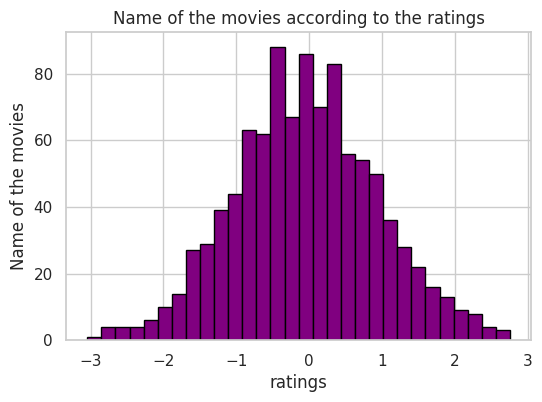

In [ ]:
np.random.seed(0)#For reproducibility
data = np.random.normal(loc=0, scale=1, size=1000)#Generate random data with normal distribution
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, color='purple', edgecolor='black')#Histogram showing the distribution of data
plt.title('Name of the movies according to the ratings')#Histogram of data distribution
plt.xlabel('ratings')
plt.ylabel('Name of the movies')
plt.grid(True)
plt.show()

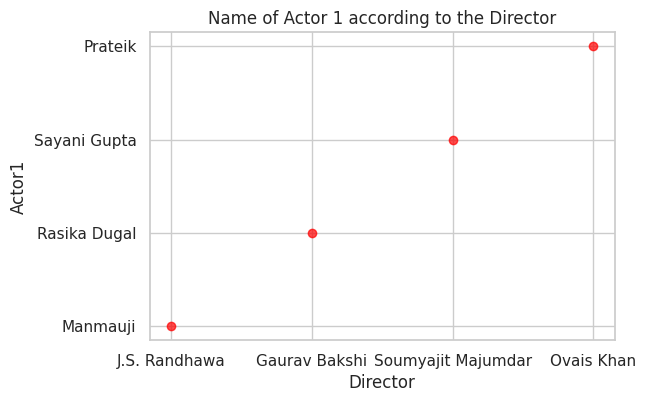

In [ ]:
import matplotlib.pyplot as plt

# Fill NaN values with a placeholder string
df['Director'].fillna('Unknown', inplace=True)
df['Actor 1'].fillna('Unknown', inplace=True)

plt.figure(figsize=(6,4))
x=df["Director"].head(4)
y=df["Actor 1"].head(4)
plt.scatter(x,y,color='red',alpha=0.7)#Scatter plot showing relationship between x and y
plt.title("Name of Actor 1 according to the Director")
plt.xlabel("Director")
plt.ylabel("Actor1")
plt.grid(True)
plt.show()

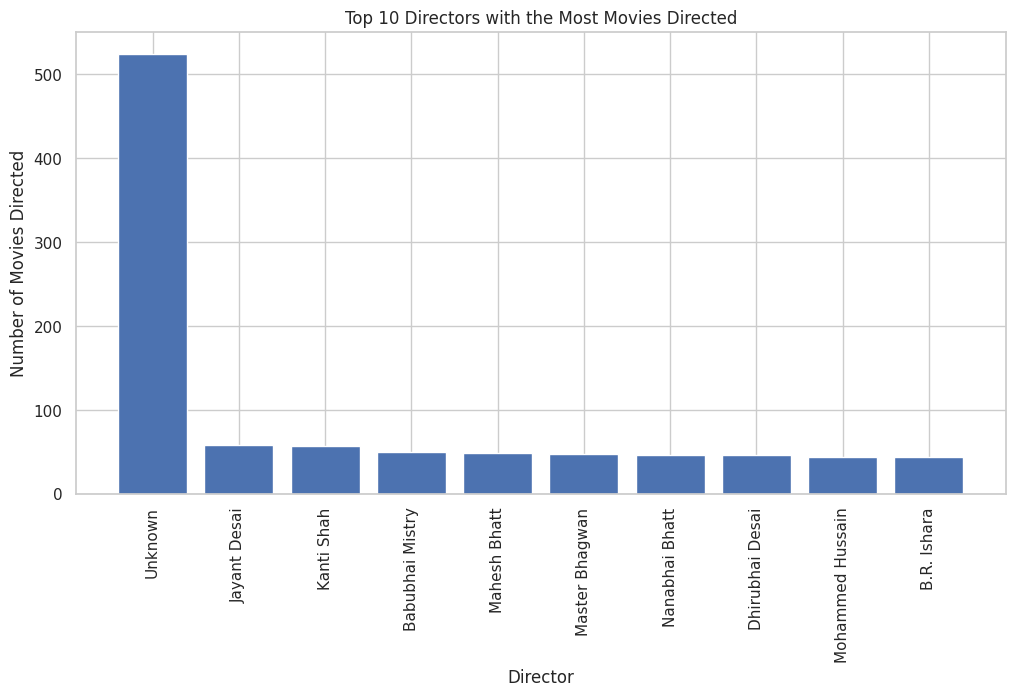

In [ ]:
# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()

# Select the top 10 directors with the most movies directed
top_10_directors = director_counts.head(10)

# Create a bar plot to visualize the top 10 directors with the most movies directed
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values),
plt.title('Top 10 Directors with the Most Movies Directed')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=90)
plt.show()

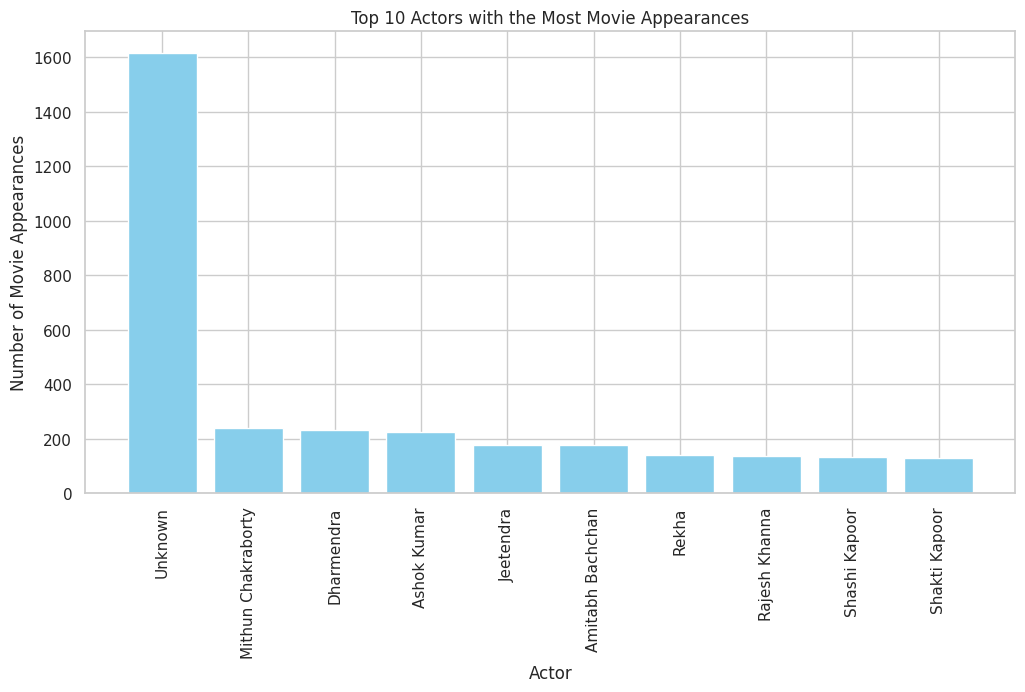

In [ ]:
# Count the number of movies in which each actor starred
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()

# Select the top 10 actors with the most movie appearances
top_10_actors = actor_counts.head(10)

# Create a bar plot to visualize the top 10 actors with the most movie appearances
plt.figure(figsize=(12, 6))
plt.bar(top_10_actors.index, top_10_actors.values,  color='skyblue')
plt.title('Top 10 Actors with the Most Movie Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Movie Appearances')
plt.xticks(rotation=90)
plt.show()

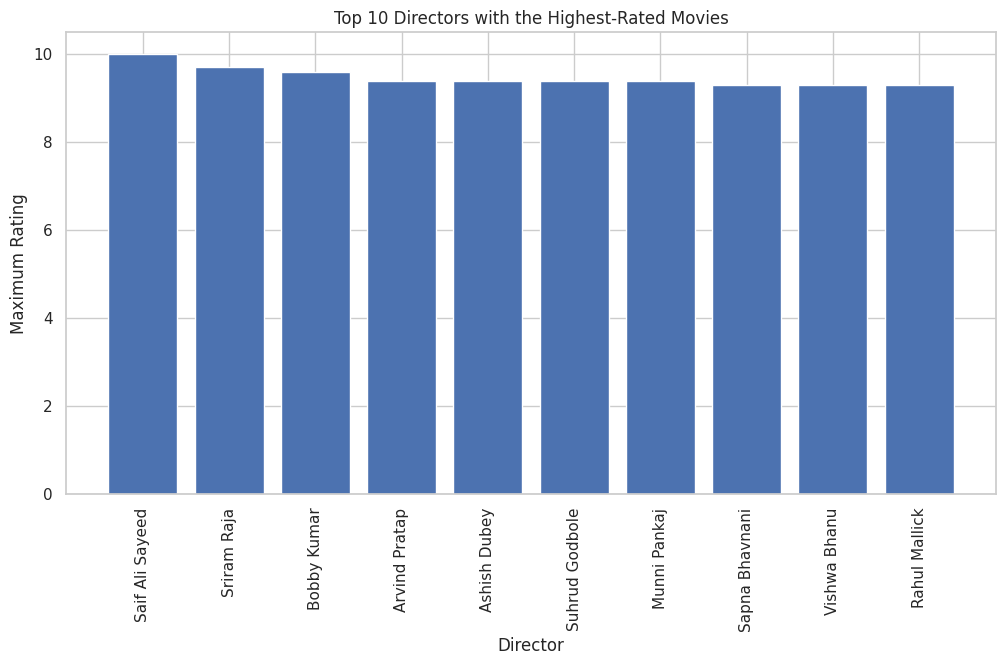

In [ ]:
# Group the data by director and find the maximum rating within each group
directors_max_rating = df.groupby('Director')['Rating'].max()

# Sort the directors by their highest rating in descending order and select the top 10
top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 directors with the highest-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()

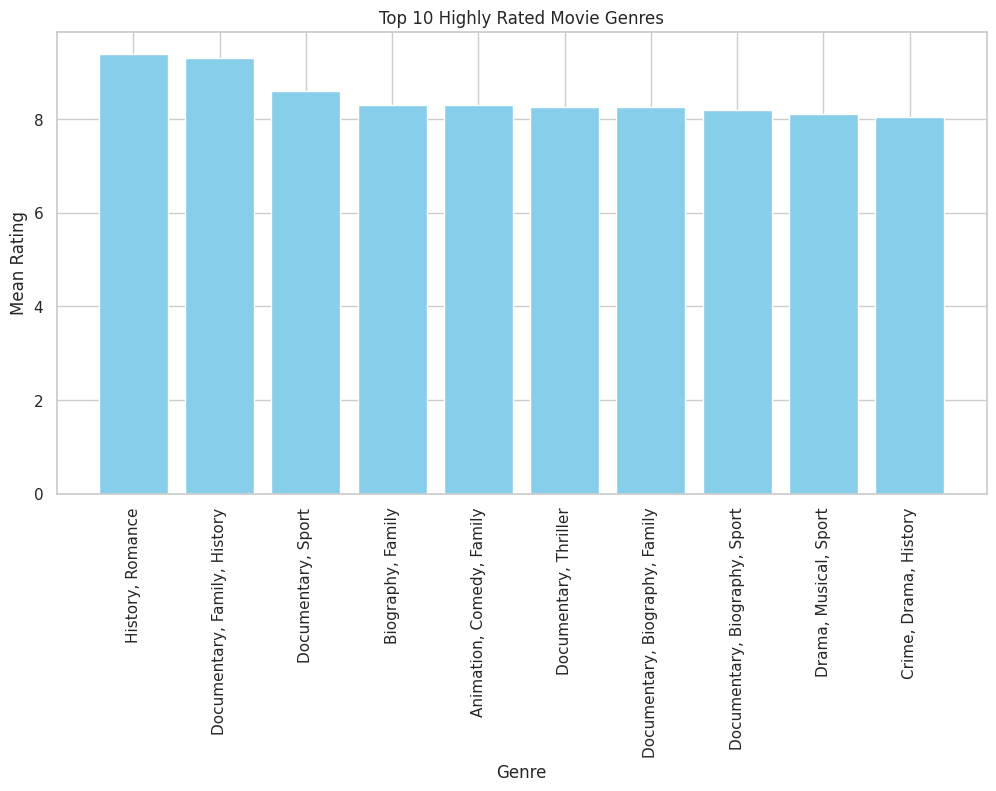

In [ ]:
# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()

# Sort the genres by mean rating in descending order and select the top 10
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 highly rated genres
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Count the occurrences of each Director and Actor 1 combination
collaboration_counts = df.groupby(['Director', 'Actor 1']).size().reset_index(name='collaboration_count')

# Sort the collaborations by count in descending order
frequent_collaborations = collaboration_counts.sort_values(by='collaboration_count', ascending=False)

# Display the most frequent collaborations (you can adjust the number to display)
print("Most frequent Director and Actor 1 collaborations:")
display(frequent_collaborations.head(20)) # Display top 20 collaborations

Most frequent Director and Actor 1 collaborations:


Director                    Actor 1  \
12104                   Unknown                    Unknown   
160    Abbas Alibhai Burmawalla  Mastan Alibhai Burmawalla   
11137              Shyam Ramsay               Tulsi Ramsay   
8837              Rajiv Chilaka                    Unknown   
10664                  Shakeela                    Unknown   
6448             Master Bhagwan             Master Bhagwan   
2800                  Dev Anand                  Dev Anand   
11841             T.L.V. Prasad         Mithun Chakraborty   
2076                   Bhimsain                    Unknown   
5212                 Kanti Shah                Sapna Sappu   
8267                R. Krishnan                   S. Panju   
3046           Dinesh Chaudhary                Uttar Kumar   
3297                Franz Osten                Devika Rani   
2639               David Dhawan                    Govinda   
7271               Navinchandra                    Unknown   
2408             Chandulal Shah                      Gohar   
12327               Vijay Anand                  Dev Anand   
7816             Phani Majumdar                    Unknown   
6632           Mohammed Hussain                 Dara Singh   
4001                 Homi Wadia             Fearless Nadia   

       collaboration_count  
12104                  524  
160                     22  
11137                   21  
8837                    19  
10664                   18  
6448                    17  
2800                    15  
11841                   14  
2076                    13  
5212                    13  
8267                    11  
3046                    11  
3297                    11  
2639                    10  
7271                    10  
2408                    10  
12327                   10  
7816                     9  
6632                     9  
4001                     9

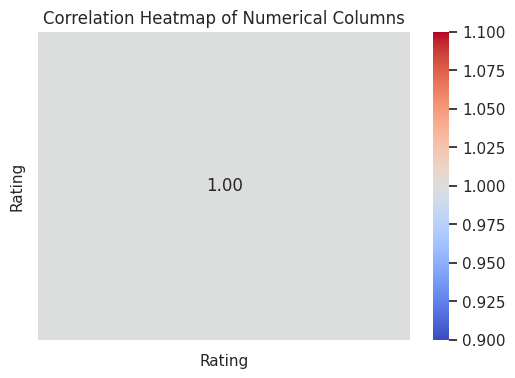

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

# Select only numerical columns for the correlation heatmap
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [ ]:
sns.set(style='whitegrid')

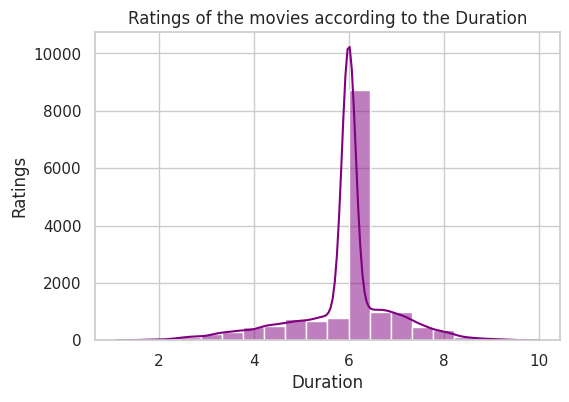

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'],bins=20,kde=True, color='purple')#Histogram with KDE overlay
plt.title('Ratings of the movies according to the Duration')#Histogram with KDE showing Recived Amount distribution
plt.xlabel('Duration')
plt.ylabel('Ratings')
plt.show()

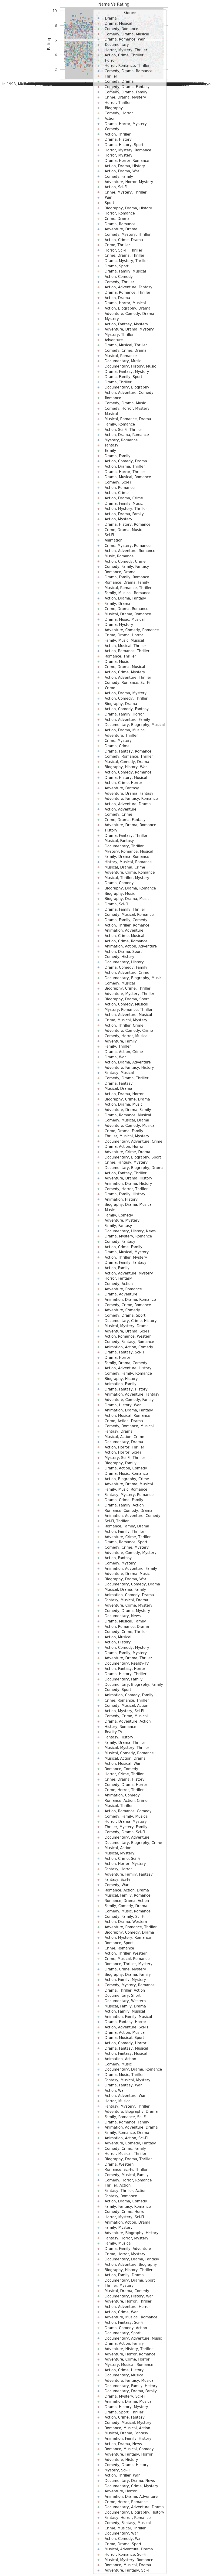

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.scatterplot(x='Name',y='Rating',data=df, hue='Genre',palette='deep',alpha=0.7)
plt.title('Name Vs Rating')
plt.xlabel('Name')
plt.ylabel('Rating')
plt.show()

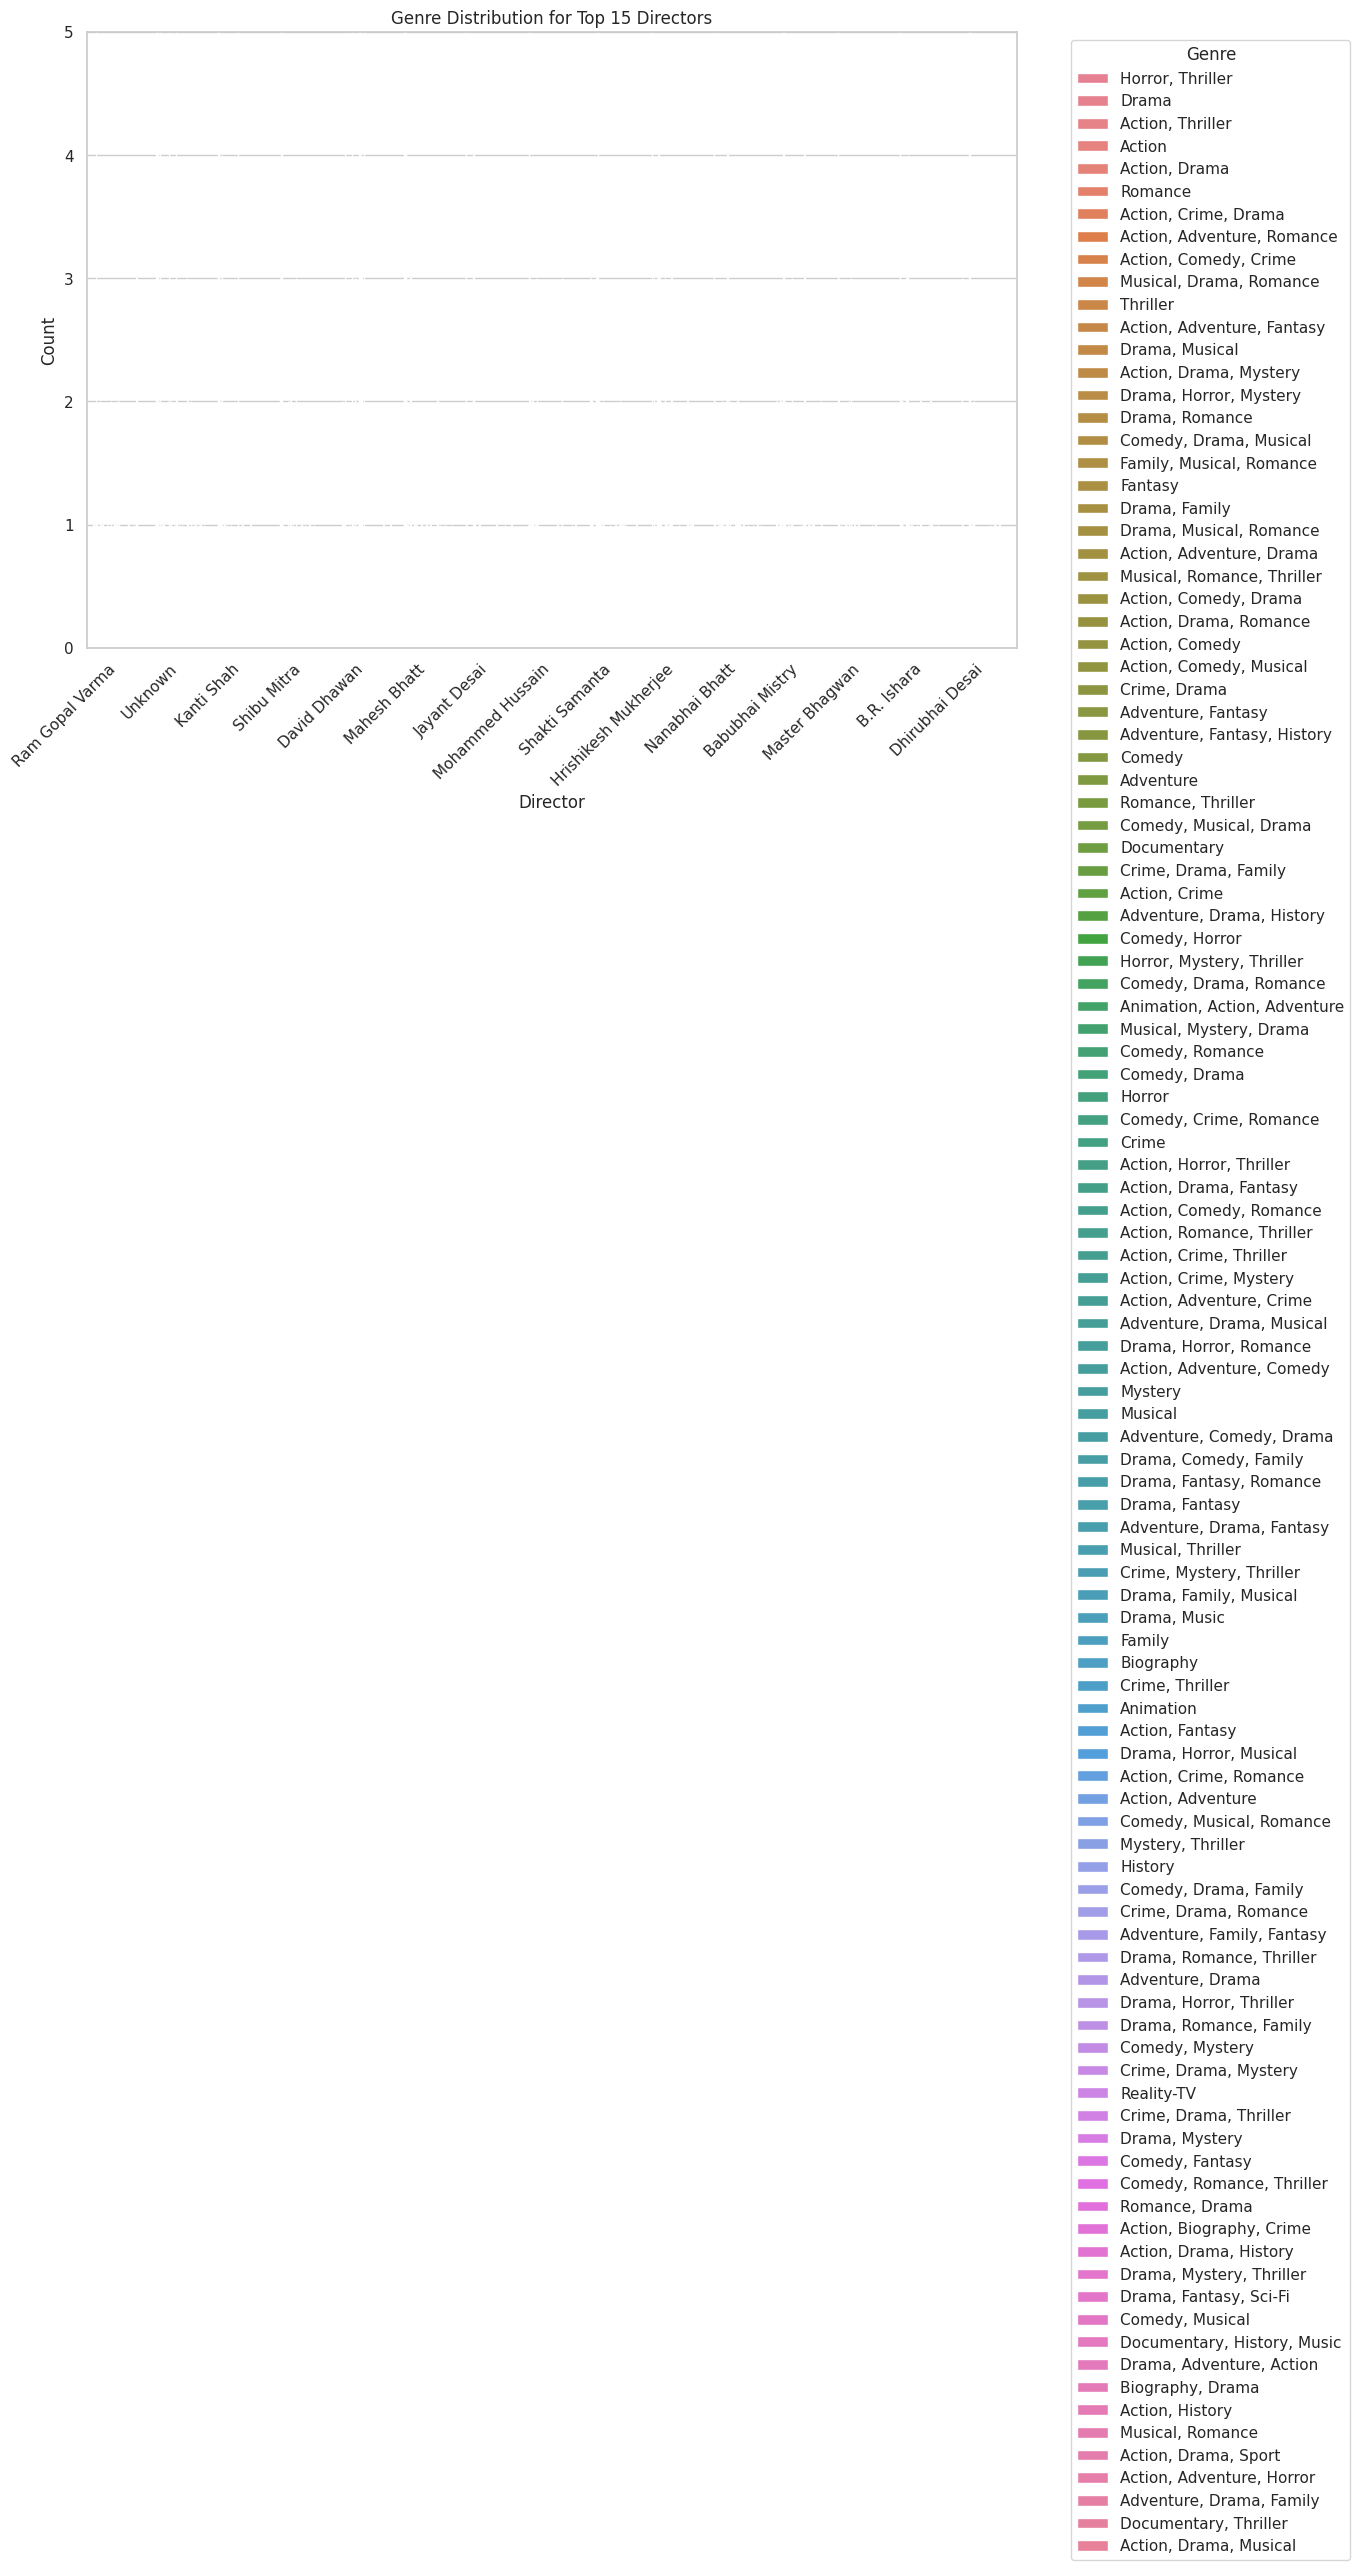

In [ ]:
# Find the top N directors (you can adjust N as needed)
top_n = 15  # For example, top 15 directors
top_directors = df['Director'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only movies by the top directors
df_top_directors = df[df['Director'].isin(top_directors)].copy()

# Create the countplot for the top directors
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_directors, x='Director', hue='Genre')
plt.title(f'Genre Distribution for Top {top_n} Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(0, 5) # Set y-axis limit to zoom in on lower counts
plt.show()

<Figure size 1200x800 with 0 Axes>

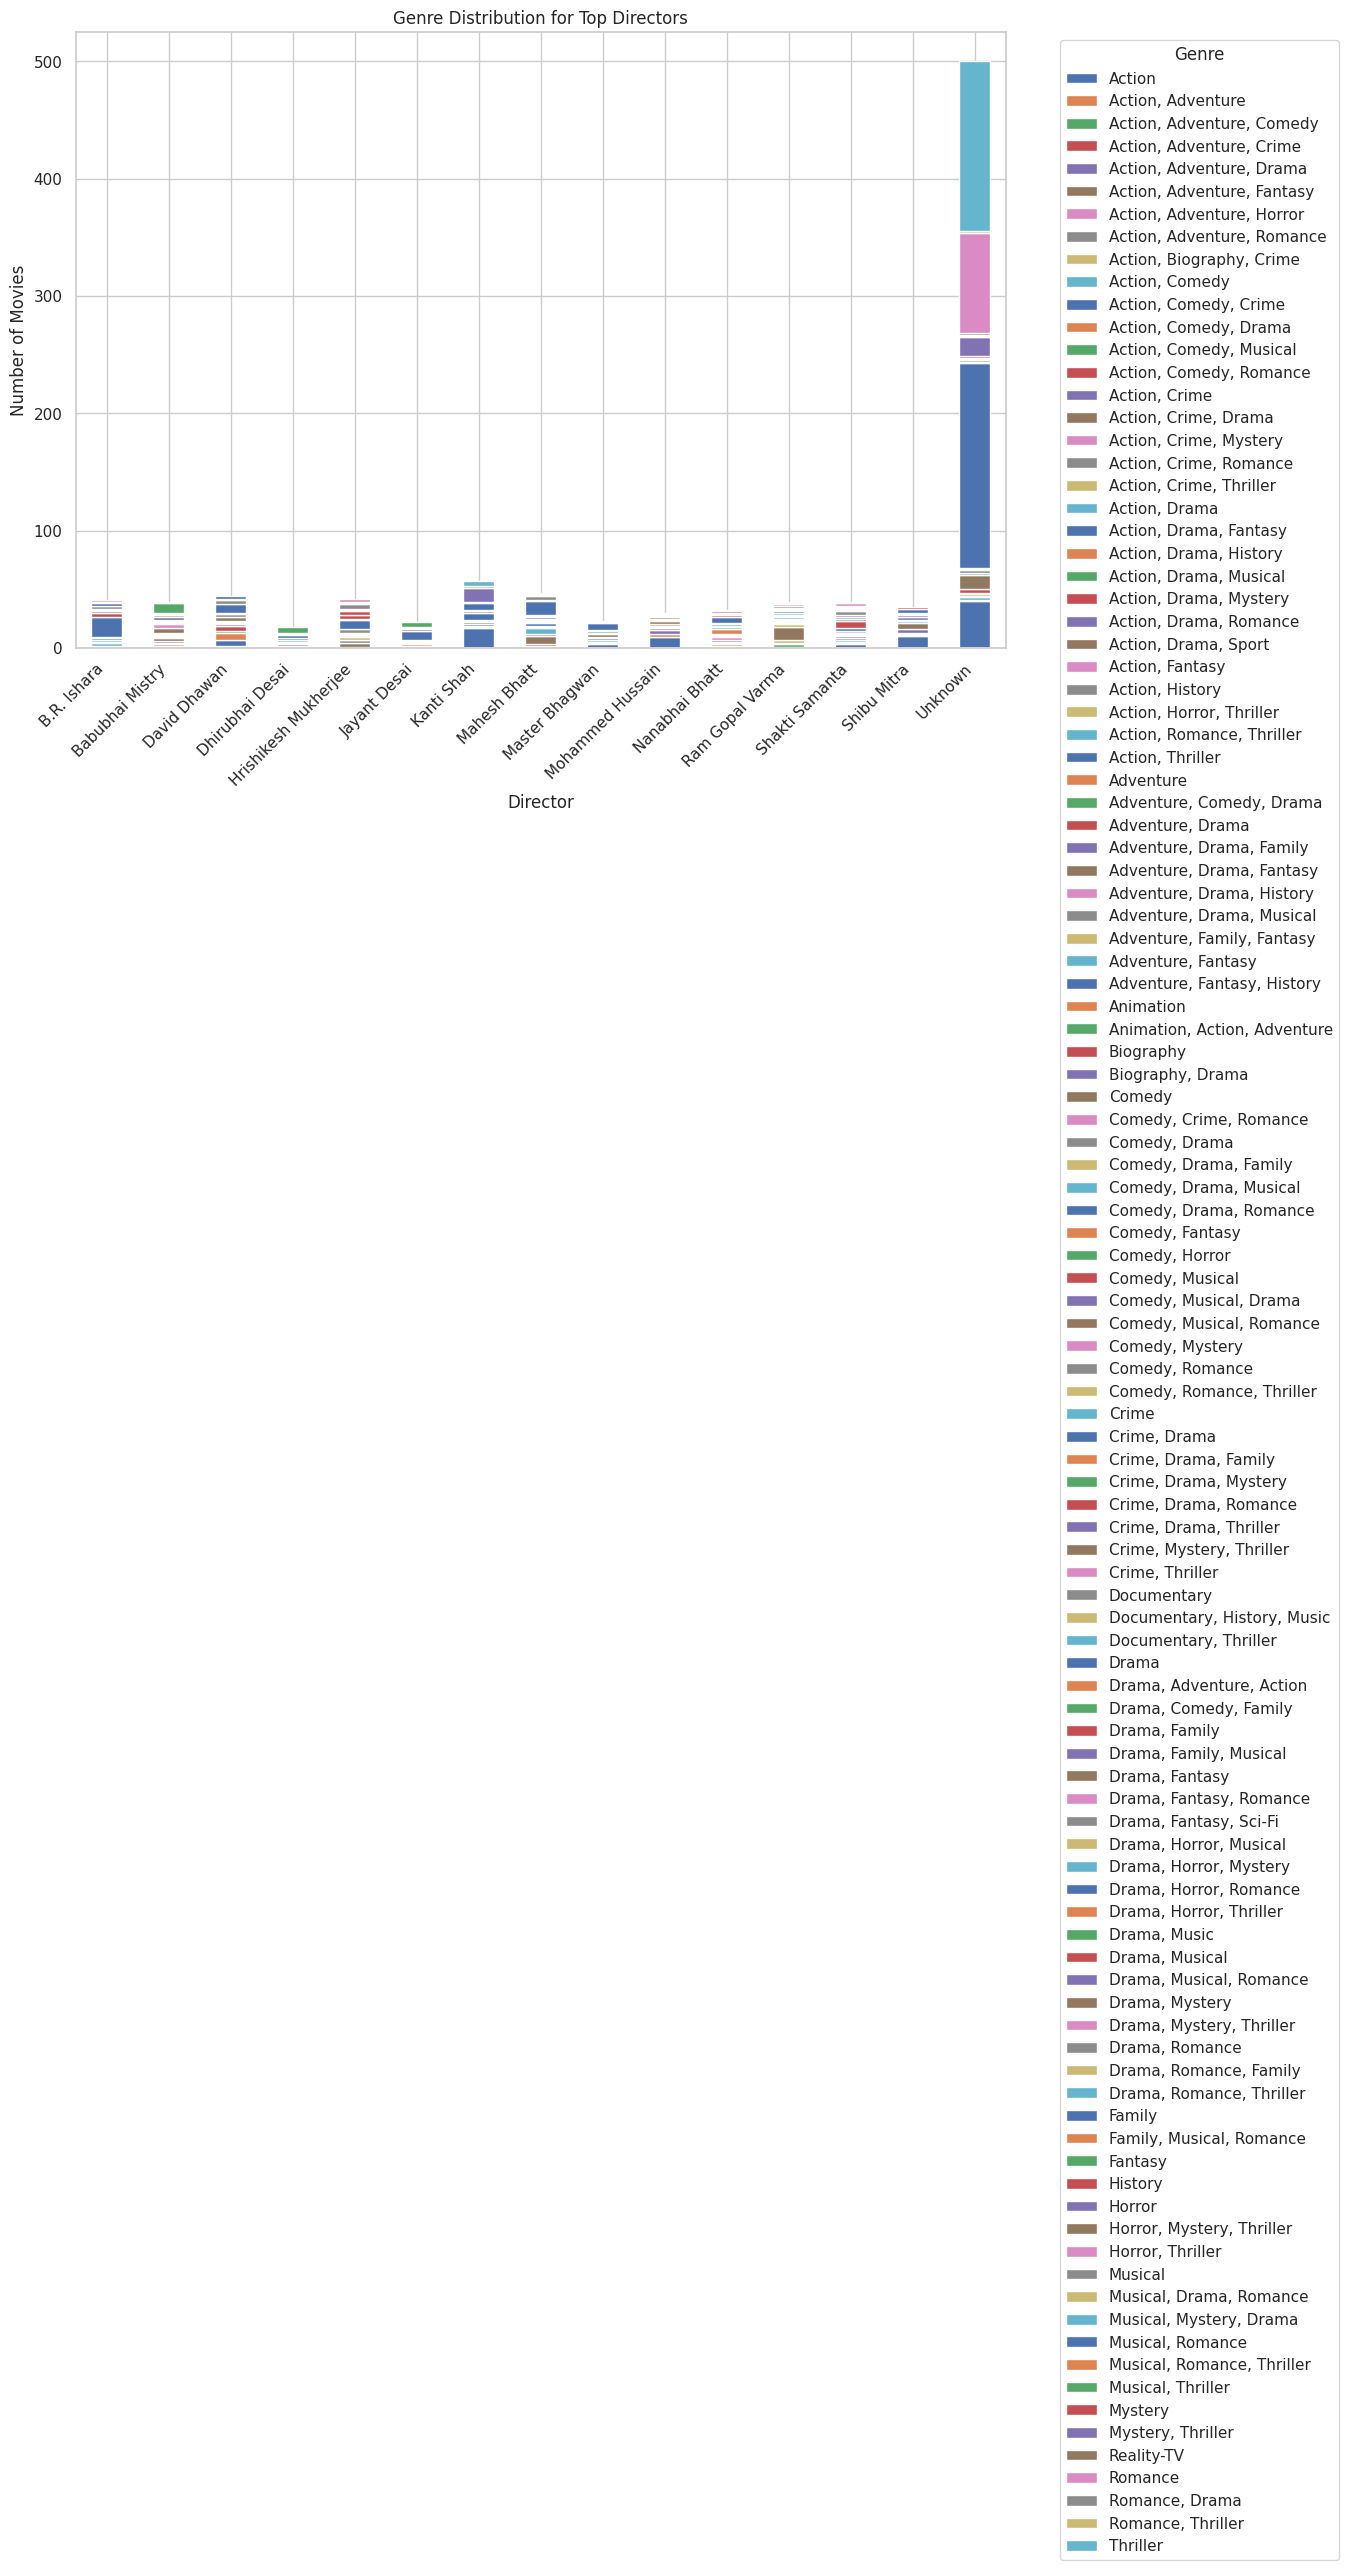

In [ ]:
# Count the occurrences of each Director-Genre combination
director_genre_counts = df.groupby(['Director', 'Genre']).size().reset_index(name='count')

# Find the top N directors (you can adjust N as needed)
top_directors = df['Director'].value_counts().nlargest(15).index

# Filter the counts for the top directors
top_directors_genre_counts = director_genre_counts[director_genre_counts['Director'].isin(top_directors)]

# Pivot the data for the stacked bar chart
pivot_df = top_directors_genre_counts.pivot(index='Director', columns='Genre', values='count').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Genre Distribution for Top Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

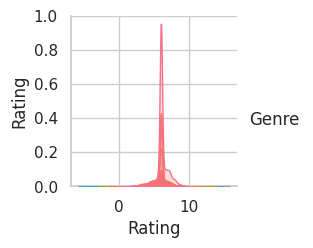

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(df[["Name","Genre","Rating","Director","Actor 1","Actor 2","Actor 3"]],diag_kind="kde",hue="Genre")
plt.show()

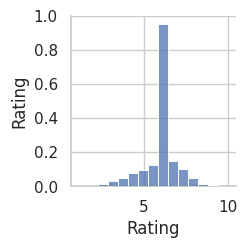

In [ ]:
# Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])

# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()


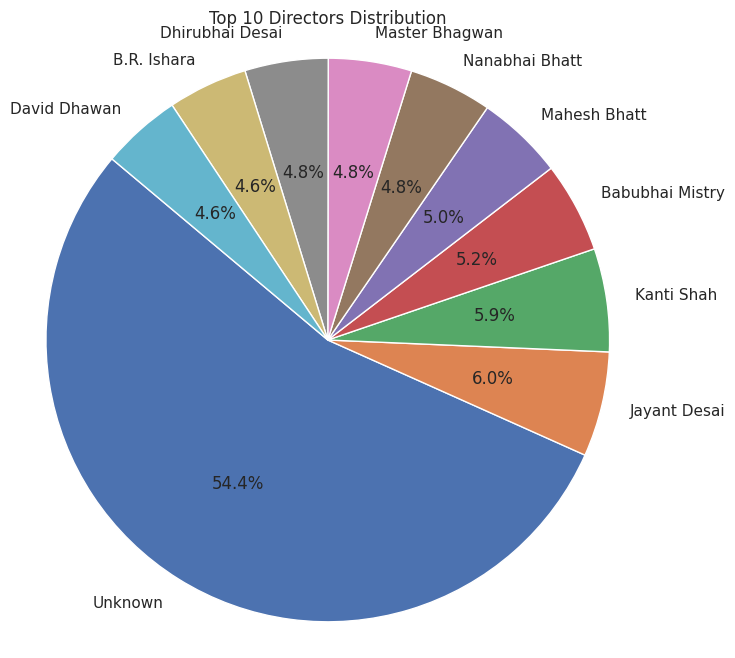

In [ ]:
# Get the counts of each director
director_counts = df['Director'].value_counts()

# Select the top N directors (you can adjust N as needed)
top_n = 10  # For example, top 10 directors
top_directors_counts = director_counts.nlargest(top_n)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_directors_counts, labels=top_directors_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Directors Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

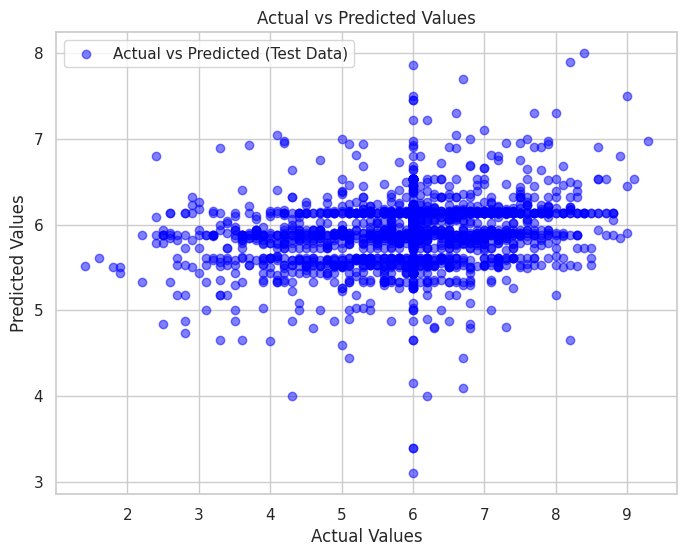

In [ ]:
#Define predictor variable
X=df["Genre"]
#Define target variable
y=df["Rating"]

#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# One-hot encode the 'Genre' column
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns so both have the same dummy columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Handle missing values in y_train by filling with the median
y_train = y_train.fillna(y_train.median())

simple_model=LinearRegression()
simple_model.fit(X_train,y_train)

# Handle missing values in y_test by filling with the median of y_train
y_test = y_test.fillna(y_train.median())

#Predictions
y_pred=simple_model.predict(X_test)

# Create a scatter plot for the test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Actual vs Predicted (Test Data)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Handle missing values in y_train by filling with the median
y_train = y_train.fillna(y_train.median())

simple_model=LinearRegression()
simple_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Handle missing values in y_test by filling with the median of y_train
y_test = y_test.fillna(y_train.median())

#Predictions
y_pred=simple_model.predict(X_test)

In [ ]:
#Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test ,y_pred)}')
print(f'R^2 Score:{r2_score(y_test,y_pred)}')

Mean Squared Error: 0.9392953704288026
R^2 Score:0.039197073995850484


In [ ]:
#Display the coefficients of the model
coefficients=pd.DataFrame(simple_model.coef_,X_train.columns,columns=['Coefficient'])
print(coefficients)

                              Coefficient
Action, Adventure               -0.136325
Action, Adventure, Biography     1.923675
Action, Adventure, Comedy       -0.239483
Action, Adventure, Crime        -0.289658
Action, Adventure, Drama        -0.110223
...                                   ...
Thriller, Action                 0.123675
Thriller, Musical, Mystery       1.223675
Thriller, Mystery                0.657008
Thriller, Mystery, Family        0.223675
War                             -0.590611

[441 rows x 1 columns]
